In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [95]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\titanic.csv')

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.shape

(891, 12)

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
data.fillna(0, inplace=True)

In [38]:
data.Embarked.value_counts()

S    644
C    168
Q     77
0      2
Name: Embarked, dtype: int64

In [39]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
data['Cabin'] = data['Cabin'].astype(str)
data['Embarked'] = data['Embarked'].astype(str)

In [90]:
data.nunique

<bound method DataFrame.nunique of      PassengerId Survived  Pclass  \
0              1        0       3   
1              2        1       1   
2              3        1       3   
3              4        1       1   
4              5        0       3   
..           ...      ...     ...   
886          887        0       2   
887          888        1       1   
888          889        0       3   
889          890        1       1   
890          891        0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                            

In [91]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [92]:
data.describe

<bound method NDFrame.describe of      PassengerId Survived  Pclass  \
0              1        0       3   
1              2        1       1   
2              3        1       3   
3              4        1       1   
4              5        0       3   
..           ...      ...     ...   
886          887        0       2   
887          888        1       1   
888          889        0       3   
889          890        1       1   
890          891        0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                             

In [97]:
corr = data.corr()
corr.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15264\890247573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


(7, 7)

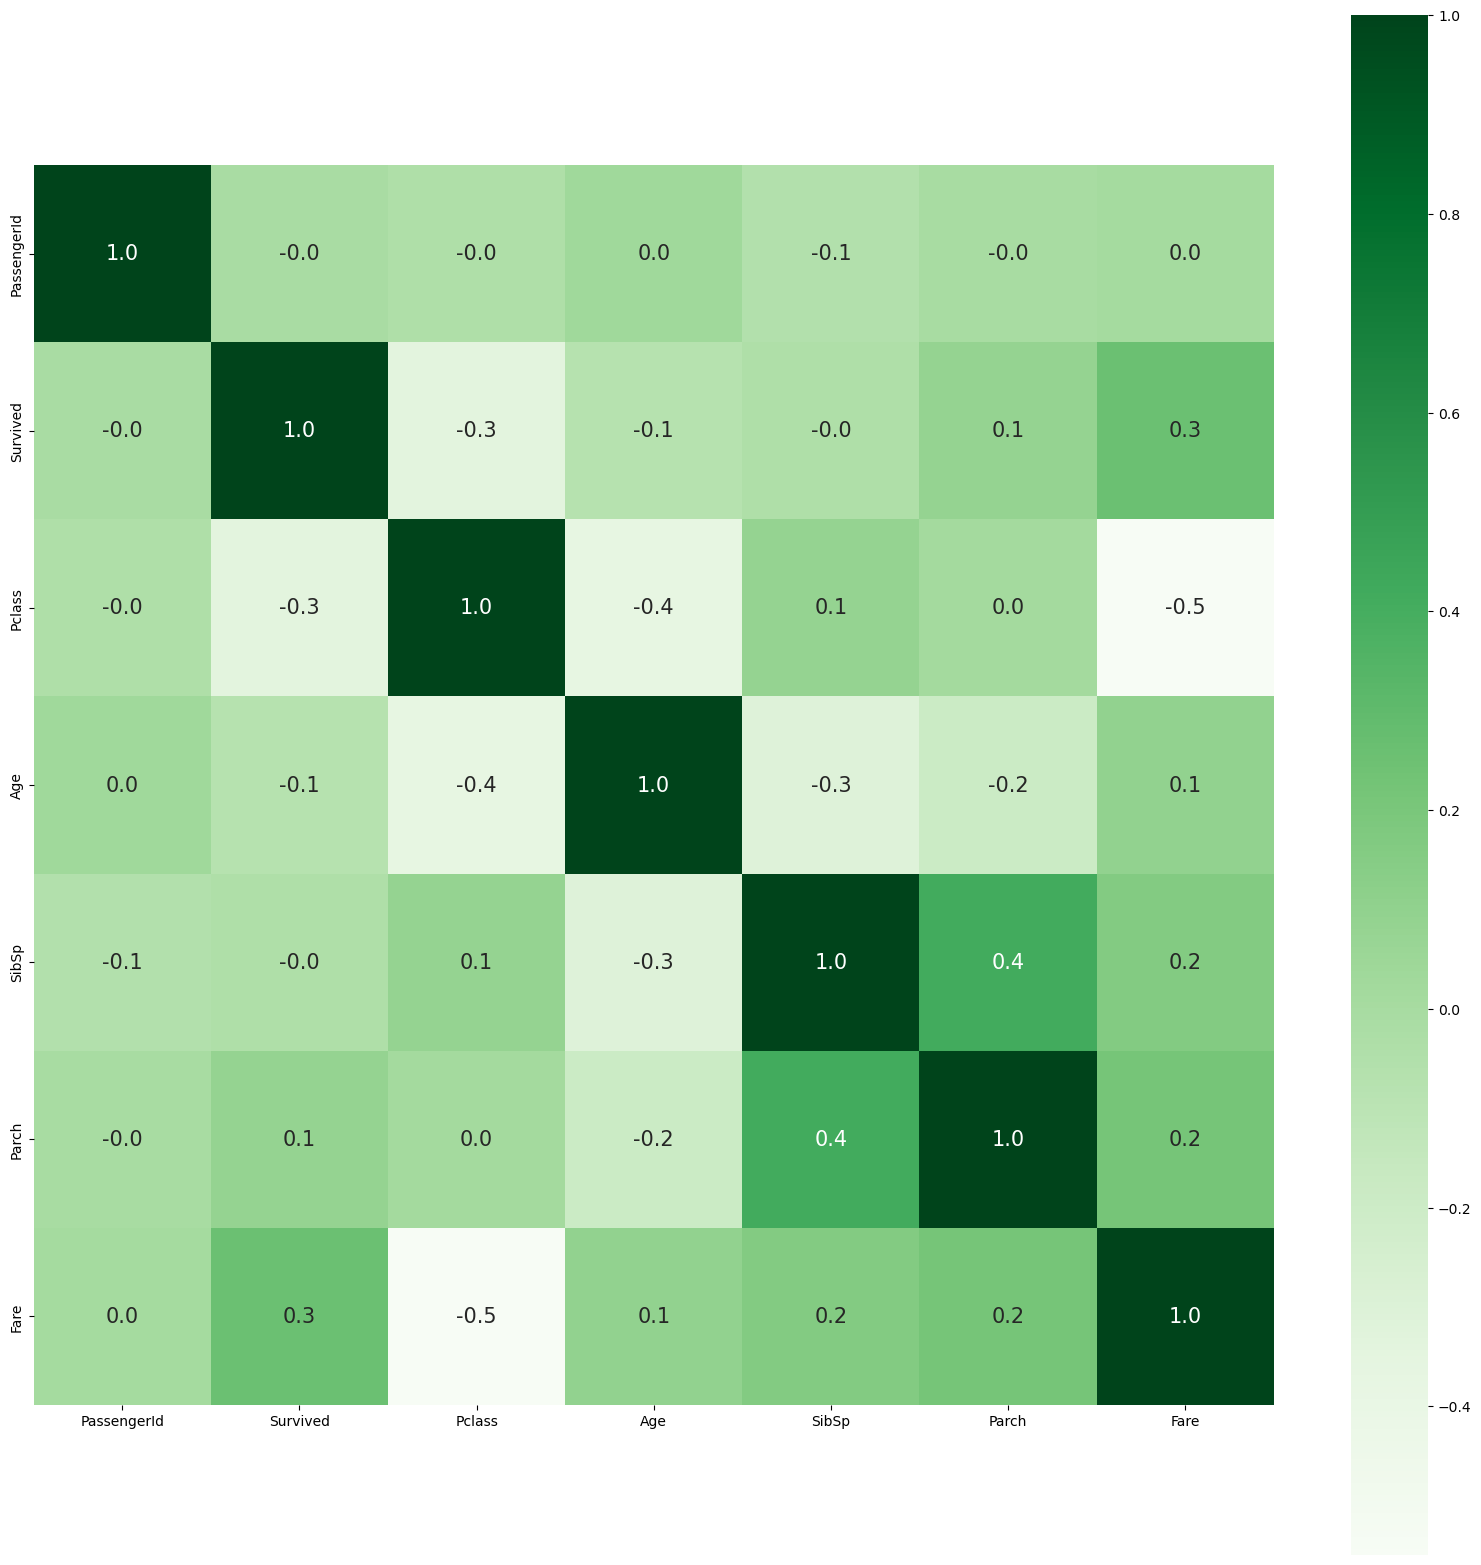

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

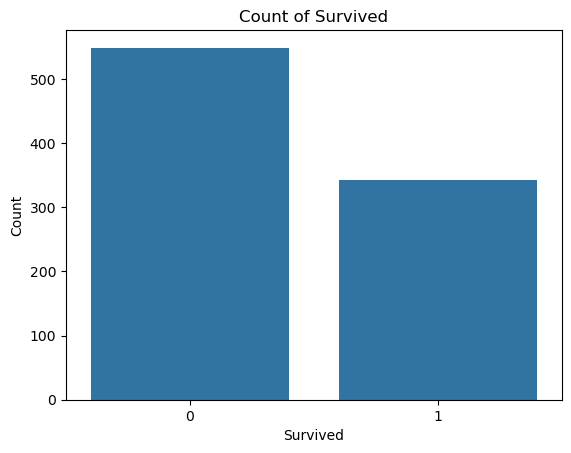

In [46]:
plt.title('Count of Survived')
sns.countplot(data=data, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

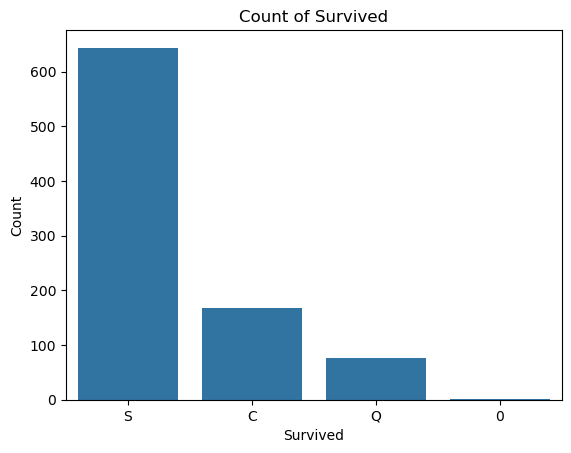

In [47]:
plt.title('Count of Survived')
sns.countplot(data=data, x='Embarked')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

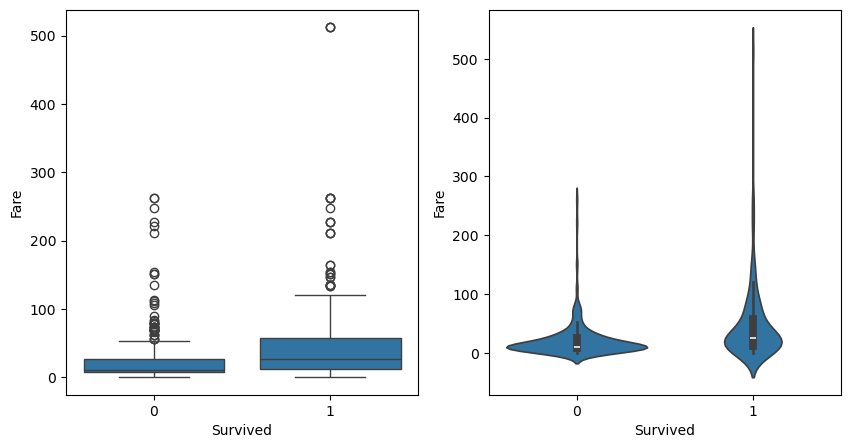

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Survived", y="Fare", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="Survived", y="Fare", data=data)
plt.show()

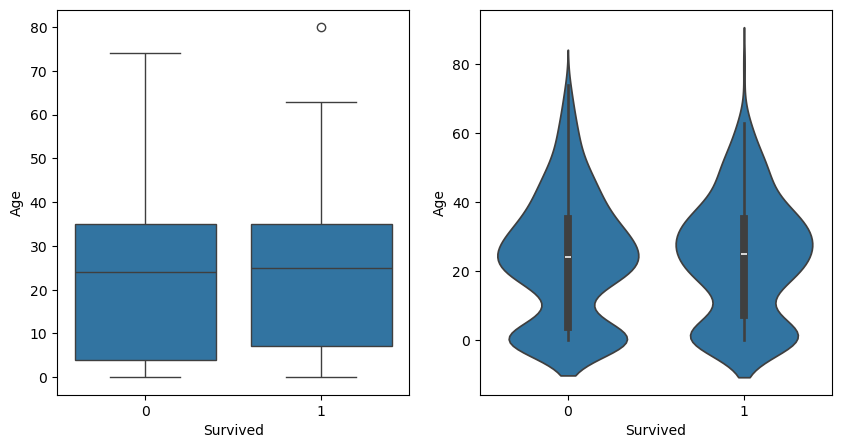

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Survived", y="Age", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="Survived", y="Age", data=data)
plt.show()

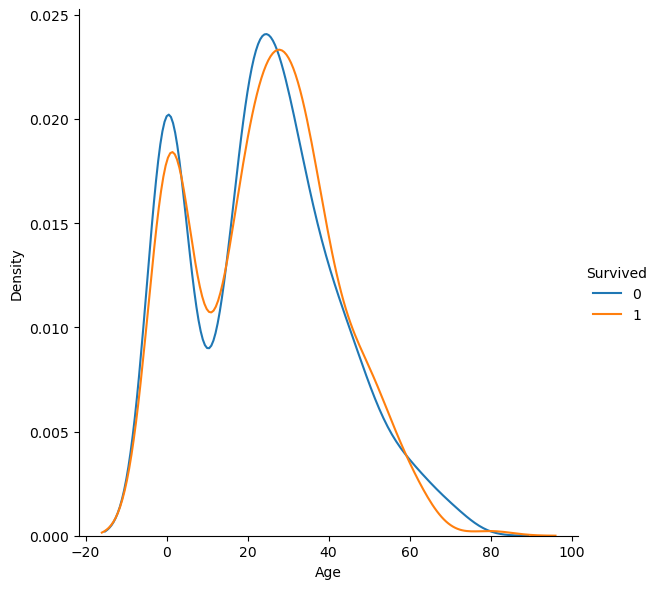

In [50]:
sns.FacetGrid(data, hue="Survived", height=6).map(sns.kdeplot, "Age").add_legend()
plt.show()

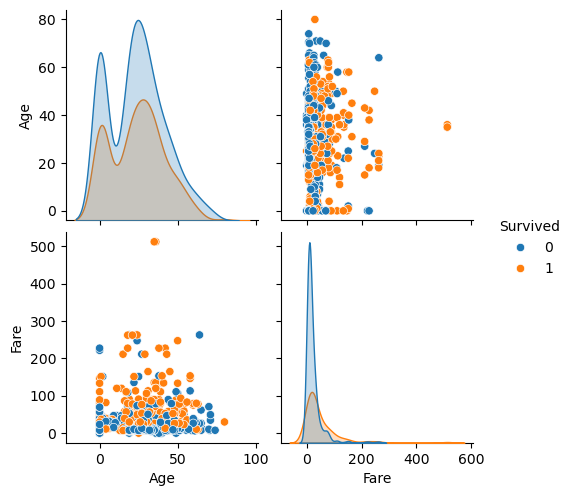

In [51]:
sns.pairplot(data, hue="Survived", vars = ["Age", "Fare"])
plt.show()

In [52]:
X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)
y = data['Survived']
data_melted = pd.melt(X, var_name='Feature', value_name='Value')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (623, 7)
Size of test set: (268, 7)


In [53]:
X_train_str = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_test_str = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
X_train = pd.concat([X_train_str, X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]], axis=1)
X_test = pd.concat([X_test_str, X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]], axis=1)

In [54]:
X_train = X_train.drop(['Embarked_0'], axis = 1)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
parameters = {'n_neighbors': [3, 4, 5, 10],'weights': ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size' : [10, 20, 30, 50]}
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
knn = grid_obj.best_estimator_
knn.fit(X_train,y_train)

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    re

C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_classification.py", line 269, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = Arg

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [56]:
y_pred = knn.predict(X_test)

In [57]:
y_pred = knn.predict(X_test)
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  69.03


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[134  34]
 [ 49  51]]


In [59]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       168
           1       0.60      0.51      0.55       100

    accuracy                           0.69       268
   macro avg       0.67      0.65      0.66       268
weighted avg       0.68      0.69      0.68       268



In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  80.6


C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
y_pred

array(['0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'],
'criterion': ['entropy', 'gini'],
'max_depth': [2, 3, 5, 10, 50],
'min_samples_split': [2, 3, 50, 100],
'min_samples_leaf': [1, 5, 8, 10]
}
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  69.03


C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda34\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda34\lib\

In [88]:
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree',
'K - Nearest Neighbors'],
'Score': [acc_logreg, acc_dt, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.60
1,Decision Tree,69.03
2,K - Nearest Neighbors,69.03
